# Convolutional Neural Networks

When data is not lineaerly separable, we can solve it by introducing more features. For instance, ponder the XOR problem. If we could use a third dimension, it would probably be easily separable as long as all points aren't just sitting on a plane.

### How to get new features?
1. <b>Feature Engineering:</b> Manually engineer new features using expert knowledge. (InterPep)
2. <b>Feature Learning</b> Make the model sensitive to parameters such that learning these parameters identifies a good representation.

## Convolutional Networks
What happens with the weigths $\theta$ with image-input? It becomes huuuuuge, since its dimensions is the number of inputs times the number of nodes it will pass the input to. This, of course, is unfeasable because of the sheer number of weights.

- CNN is suitable for data with known, grid-like topology
    - Time series
    - Images "tensors"
    - Medical data

"Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers."

> Aleays try to be accurate with which dimension in which! Indexing can soon become a nightmare if not treated correctly!

Convolution works by shifting your kernel over the data and recording the scalar output.

> CNN use <u>correlation</u>, not convolution! (there is a flipping step in colvolution which is not done in CNN, because it is unneccesary when you have learned weights.

## Convolution
When using convolution, most weights in $\theta$ will be zero. Only closeby values will be regarded.

### How do we deal with data at edges?
For instance, say we apply weights to two positions back and two positions forward:
- We could set outside values to undefined ("valid convolution"), which means your feature map will shrink each step.
- We could assume all non-existant values are 0
- We could assume a "circular" matrix (the last value of row one leads to the first value of row 2) ("periodic")

## 2D-convolution
Images become feature maps, both input and output. Sliding out kernel (which could, for instance be a 2x2 window).

### Block circulant
A repetitions of matrices, offset by 1 each new row:

```
M1 M2
   M1 M2
      M1 M2
```

## Motivation of CNNs
1. Sparse (and local) interaction
2. Parameter sharing
3. Equivariant representation

### Sparse (and local) interaction
Ponder a kernel of size 3:
```
1 2 3 4 5 INPUT
|X|X|X|X|
1 2 3 4 5 OUTPUT
```

Input 3 only affects output value 2, 3, and 5. In a regular neural net, all inputs would affect all outputs.

Downside: output 1 will never see data from input 3. Solution: MORE LAYERS
```
1 2 3 4 5 INPUT
|X|X|X|X|
1 2 3 4 5 HIDDEN
|X|X|X|X|
1 2 3 4 5 OUTPUT
```


- fewer parameters
- lower memory requirements
- better statistical efficiency
- fewer operations
- increased depth can still indirectly connect all input

### Parameter sharing
Using tied weights! Meaning all `|` lines in a row could share weights for instance. (or all `/` lines)

- Reduced storage requirements
- same time complexity
- sometimes sharing should be limited. Perhaps the edges if an image should have special weights

> Receptor field of output neuron X is the input neurons Y which eventually have their output come to X.

You could also "tile" parameters. For instance, maybe every second vertical connection share their weights, or every third.

### Equivariant Convolution
- A function $f$ is <b>invariant</b> under operation $g$ if:
    - applying $g$ to the input of $f$ does not change its output
    - different inputs (modulo $g$) have different outputs
- A function $f$ is <b>equivariant</b> under operation $g$ if:
    - applying $g$ to the input if $f$ changes its output by $\tilde{g}$ (a different way to describe $g$). A shift of input will equally shift the output.
    - different inputs have different outputs

Easy for discrete shift operations, more tricky for rotation and scaling.

---

## Network Layers
Each layer consists of 3 stages:
1. calculate convolutions
2. detector stage (activation function)
3. pooling function

> Complex layer terminology: one layer is one repetition of these three steps
>
> Simple layer terminology: each step is one layer

### Pooling
Summary statistics of nearby outputs
- Max Pooling: maximum output in rectangular region. THIS is what makes CNN work properly
- Average Pooling. THIS sucks.
- L2 norm
- weighted average pooling (based on distance from central position)

Pooling is approximately invariant to small translations

#### Pooling and Invariance
In max-pooling there is local invariance: low amounts of errors will not affect output locally (a pooled trio [1 2 4] gives 4, just as [2 1 4] gives 4).

### Bias Terms
An offset term, could be shared, could be tiled, could be individual.

---

## Strided Pooling
Pooling $s$ pixels apart instead of every pixel

```
  1   2   3 OUTPUT
 /|\ /|\ /|
1 2 3 4 5 6 INPUT
```

- improved statistical efficiency
- reduced memory requirements
- handling inputs of varying size (you adapt the stride size to the size of the image, rather than using a fixed stride. Twice the image size: twize the stride step length)
- BUT: pooling ands strides complicate top-down process (e.g. auto-encoders)

## Strided Convolution
Similar but for convolution. Good way of down-sampling.

## Zero-padding
If you use "valid convolution", each layer will shrink one point at a time, and the only neuron which have all inputs in its receptor field will be the last one left if you go all the way down to only 1. Zero-padding, where you use the same convolution for all and just introduce zeroes if values are missing, solves this.

## Activation Function

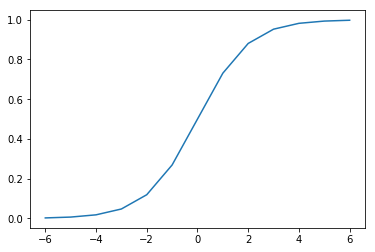

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

X = np.arange(-6, 7)
Y = [1/(1+math.e**(-i)) for i in X]

plt.plot(X, Y)
plt.show()

### Softmax layer

$y_i = \frac{\exp{z_i}}{\sum_j\exp{z_i}}$

MOST POWERFUL NETWORK: RECTIFIED LINEAR UNIT

$f(z) = \{\frac{0, z < 0}{z, z > 0}$

## Loss Function
Difference to optimization: In optimization we know all the data, and we want to overfit to it. In machine learning, we don't know all the data.

Expected loss:

$J(\vec{\theta}) = \int L(\phi(\vec{x}^T\vec{\theta}), y) p(\vec{x}) d\vec{x}$

Maximum-likelyhood estimations on gaussian distributions